In [1]:
import pandas as pd
import numpy as np

In [2]:
contract_address = pd.read_csv('./data/contract_address_list.csv')

In [3]:
contract_address

,contract_address
0,0xb5a0bb8dbc8b7bfdfe16967c56283b11c6a36cc6
1,0x8f431026cae7e1d58f7a9b1c8b1819010a218496
2,0x6dc5466570020df49d3b96441542c57fa9bd7dc3
3,0x320f7bdf9d9059d3e9060171636b7932211abc0e
4,0xb0789d9e99da0d2875144d24add3140b4f10598c
...,...
16562627,0xefbc05e8575aeff3f9d738f8b757deb7b7eb44fb
16562628,0x03fc0e441c6320483d0b7c947a5a9480068bd467
16562629,0x00a8faafb2d4afadd2510dc0b3531e14ddddae6a
16562630,0x5369bf2d1ed792e8bdfad318fae18d577b569608


In [9]:
contract_address_set = set(contract_address['contract_address'])

In [12]:
internal_transaction = pd.read_csv('./data/InternalEtherTransaction_queTimestamp.csv')

In [5]:
phishing_label = pd.read_csv('./data/phishing_label.csv')
phishing_set = set(phishing_label['address'])

In [22]:
without_contract_data = internal_transaction[~(internal_transaction['from'].isin(contract_address_set) | internal_transaction['to'].isin(contract_address_set))]

In [9]:
contract_data = internal_transaction[(internal_transaction['from'].isin(contract_address_set) | internal_transaction['to'].isin(contract_address_set))]

In [12]:
all_address_set = set(internal_transaction['from']).union(set(internal_transaction['to']))

In [14]:
len(all_address_set.intersection(phishing_set)) 

1759

In [16]:
len(contract_address_set.intersection(all_address_set).intersection(phishing_set))

46

In [19]:
without_contract_data

NameError: name 'without_contract_data' is not defined

In [17]:
len(contract_data)

90377258

In [18]:
len(without_contract_data)

247641526

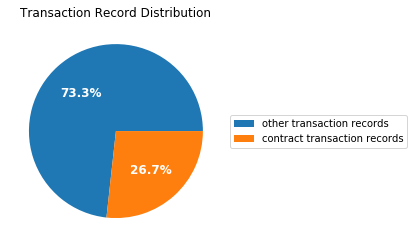

In [63]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

data = [247641526, 90377258]
ingredients = ['other transaction records', 'contract transaction records']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Transaction Record Distribution")

plt.show()

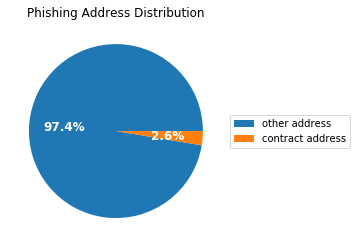

In [64]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

data = [1759-46, 46]
ingredients = ['other address', 'contract address']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Phishing Address Distribution")

plt.show()

In [68]:
1713 /247641526

6.91725668012561e-06

Text(0.5, 1.0, 'Average Phishing Address Per Transaction (Ratio)')

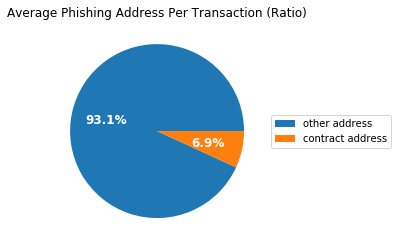

In [94]:
#平均黑樣本率
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

data = [17130000000 /247641526 , 460000000 / 90377258]
ingredients = ['other address', 'contract address']


def func(pct, allvals):
    absolute = np.sum(allvals)
    
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Average Phishing Address Per Transaction (Ratio)")


In [23]:
filtered_data = without_contract_data[(without_contract_data['blockNumber'] > 2000000) & (without_contract_data['blockNumber'] < 7000000)]

In [24]:
filtered_phishing_address_set = set(filtered_data['from']).intersection(phishing_set).union(set(filtered_data['to']).intersection(phishing_set))

In [19]:
phishing_address_count = pd.read_csv('./data/phishing_address_freq_count.csv')
phishing_label = pd.read_csv('./data/phishing_label.csv')
phishing_count_df = pd.merge(left=phishing_address_count, right=phishing_label, left_on='address',right_on='address', how='inner')


In [26]:
len(phishing_address_count)

34554

In [23]:
tt = pd.cut(phishing_address_count['count'], [0,20, 50, 100, 200,300, 400,1000, np.inf])

In [25]:
tt.value_counts()

(0.0, 20.0]        33897
(20.0, 50.0]         363
(50.0, 100.0]        139
(100.0, 200.0]        89
(200.0, 300.0]        28
(400.0, 1000.0]       19
(300.0, 400.0]        13
(1000.0, inf]          6
Name: count, dtype: int64

In [56]:
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 23,
         }

In [35]:
tmp_li = [1250, 223, 89, 49, 17, 8,4, 1]

In [36]:
import matplotlib.pyplot as plt

<BarContainer object of 8 artists>

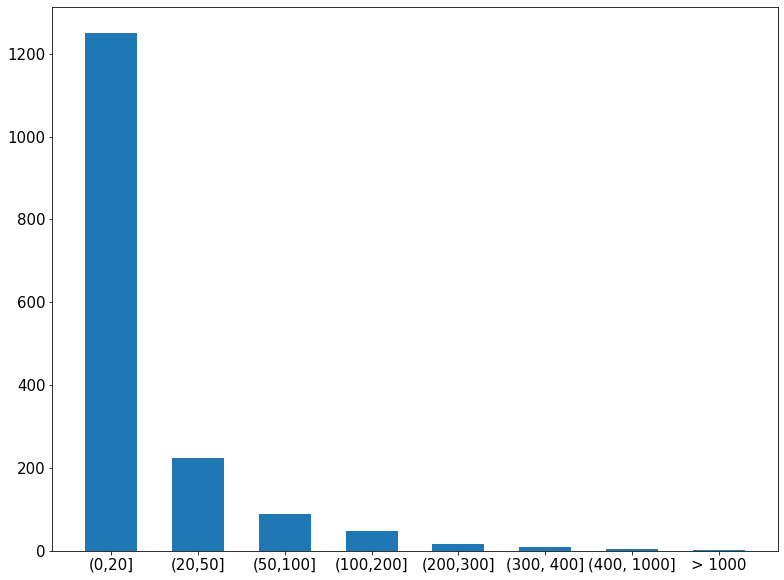

In [65]:
plt.figure(figsize=(13, 10))
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.bar(height = tmp_li, x = ['(0,20]', '(20,50]', '(50,100]', '(100,200]', '(200,300]', '(300, 400]', '(400, 1000]', '> 1000'], width=0.6)

In [28]:
filtered_phishing_count_df = phishing_count_df[phishing_count_df['address'].isin(filtered_phishing_address_set)]

In [52]:
tmp = pd.cut(filtered_phishing_count_df['count'], [0,20, 50, 100, 200,300, 400,1000, np.inf])

In [43]:
tmp = tmp.apply(lambda x: '(1000, inf)' if x == '(1000, 2000]' else x)

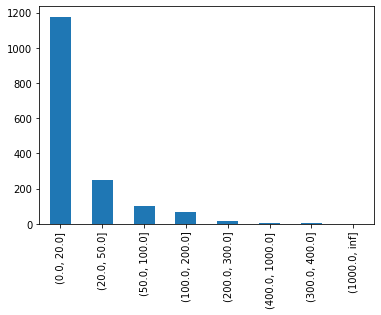

In [53]:
tmp.value_counts().plot('bar')

In [18]:
filtered_phishing_count_df

NameError: name 'filtered_phishing_count_df' is not defined

In [96]:
from_counts = internal_transaction['from'].value_counts()
to_counts = internal_transaction['to'].value_counts()

tmp_df = pd.DataFrame(from_counts).reset_index()
tmp_df = tmp_df[(tmp_df['from'] < 1000)]
from_low_freq_set = set(tmp_df['index'])

tmp_df = pd.DataFrame(to_counts).reset_index()
tmp_df = tmp_df[(tmp_df['to'] < 1000)]
to_low_freq_set = set(tmp_df['index'])
#from to 均 < 1000 较为宽松的条件
low_freq_set = from_low_freq_set.intersection(to_low_freq_set)

In [98]:
len(low_freq_set.intersection(phishing_set))

1635

In [99]:
filtered_low_freq_data =  filtered_data[(filtered_data['from'].isin(low_freq_set)) & (filtered_data['to'].isin(low_freq_set))]

In [114]:
len(filtered_low_freq_data)

55212399

In [113]:
len(filtered_data)

189265545

In [110]:
len(low_freq_set.intersection(phishing_set)) 

1635

In [14]:
len(filtered_phishing_address_set)

NameError: name 'filtered_phishing_address_set' is not defined

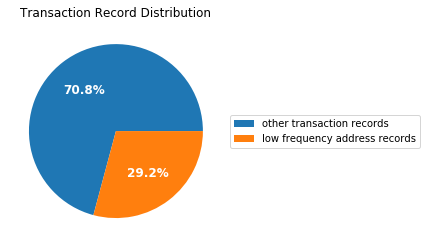

In [116]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

data = [189265545 - 55212399, 55212399]
ingredients = ['other transaction records', 'low frequency address records']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Transaction Record Distribution")

plt.show()

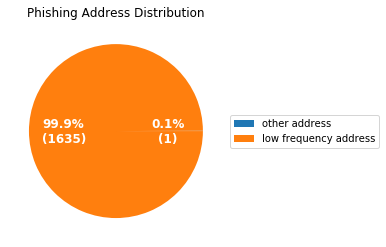

In [118]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

data = [1, 1635]
ingredients = ['other address', 'low frequency address']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Phishing Address Distribution")

plt.show()

Text(0.5, 1.0, 'Average Phishing Address Per Transaction (Ratio)')

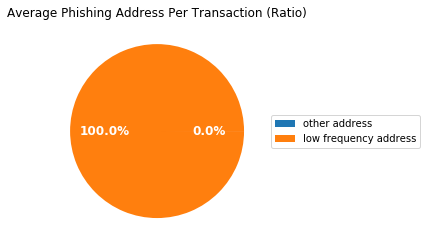

In [120]:
#平均黑樣本率
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

data = [10000000 /247641526 , 16350000000 / 55212399]
ingredients = ['other address', 'low frequency address']


def func(pct, allvals):
    absolute = np.sum(allvals)
    
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Average Phishing Address Per Transaction (Ratio)")


In [121]:
phishing_data = pd.read_csv('./data/all_phishing_data.csv')

In [134]:
tmp = pd.cut(phishing_data['blockNumber'], [0,1000000, 2000000,3000000, 4000000,5000000,6000000,7000000,8000000,9000000])

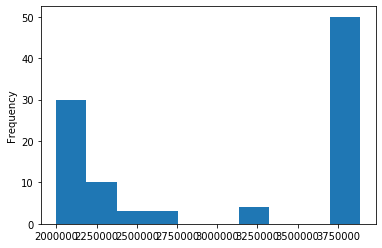

In [147]:
phishing_data['blockNumber'][:100].plot.hist()

我觉得可以有一个phishing地址的交易数量的直方图，比如交易量小于100,的多少个，100~200的多少个，类似这样，可以有更多的信息出来，也能明显的看到大于1000的数量非常少；

In [ ]:
phishing_set

In [2]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of phishing address and normal address')

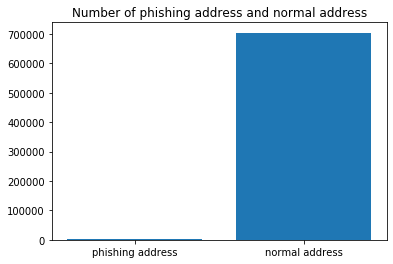

In [13]:
plt.bar(x =['phishing address', 'normal address'], height=[1635,704460])
plt.title('Number of phishing address and normal address')

## 统计未过滤前的分布

In [9]:
internal_transaction  = internal_transaction[internal_transaction['blockNumber'] < 7000000]

In [10]:
all_data_address_set = set(internal_transaction['from']).union(set(internal_transaction['to']))

In [12]:
common_contract_address = all_data_address_set.intersection(contract_address_set)
common_phishing_address = all_data_address_set.intersection(phishing_set)

In [13]:
len(all_data_address_set)

43783194

In [14]:
len(common_contract_address)

1564580

In [15]:
len(common_phishing_address)

1683

In [33]:
#内存回收
import gc
del internal_transaction
gc.collect()

28069

In [8]:
len(internal_transaction)

99

In [10]:
len(contract_address)

16562632